### 1. Text → 자막 이미지

In [1]:
import numpy as np
import pandas as pd

textdata = pd.read_csv("./input_text/testdata.csv")

In [2]:
textdata

,Start Time,End Time,Text,Lable
0,00:00:05:26,00:00:08:08,처음부터 혼자가 하려던 건 아니었다,neutral
1,00:00:24:24,00:00:27:22,연결이 되지 않아 사서함으로 연결되며,neutral
2,00:00:28:07,00:00:32:21,삐소리 이후 통행료가 부과됩니다,neutral
3,00:00:33:26,00:00:36:05,얼마나 기다린 거지?,embrassment
4,00:00:36:05,00:00:37:24,그냥 갈까?,embrassment
...,...,...,...,...
75,00:11:27:00,00:11:28:01,어쩌면 나는,neutral
76,00:11:28:01,00:11:31:25,길을 찾고 싶었던 게 아니라 그냥 길을 걷고 싶었던 것일지도 모른다,neutral
77,00:11:32:15,00:11:36:26,내일은 내일의 해가 뜨고,neutral
78,00:11:37:04,00:11:44:26,난 또 어딘가를 걷고 있겠지,neutral


In [4]:
texts = []
for i in textdata["Text"] :
    texts.append(i)
print(texts)

['처음부터 혼자가 하려던 건 아니었다', '연결이 되지 않아 사서함으로 연결되며', '삐소리 이후 통행료가 부과됩니다', '얼마나 기다린 거지?', '그냥 갈까?', '결국 혼자다', '일을 시작한 지 얼마나 됐다고', '회사를 그만두고 쉬고 있다', '길을 찾기 위해 결정한 휴식인데', '길을 잃어버린 것 같다', '괜찮다', '천천히 해도 된다', '부모님의 배려가 조금씩 버겁게 느껴진다', '하늘은 참 맑구나', '솔직히 모르겠다', '내가 가는 길이 과연 맞는 걸까?', '앞으로 걸어갈 길을 고민하기 위해 캠핑을 갔다', '큰마음 먹고 캠핑용품을 샀고,', '무작정 차를 빌렸다', '혼자 오려던 건 아니다', '원래 함께 하기로 한 친구가 있었는데', '뭐 그렇게 됐다', '혼자 왔어도', '캠핑 기분은 내야겠지?', '캠핑은 어두워져 있을 때가 제맛이라', '주변을 산책하기 좋은 곳에 갔다', '산책하러 온 것치고는 어마어마하네', '그래도 너무 좋다', '어로와 향로 두 개의 길', '어로로 걸어야 한다면', '다 이렇게 걷는 길이 정해져 있으면', '참 좋을 텐데', '낯설지 않다, 이 풍경', '혹시 예전에', '나는 왕족이 아니었을까?', '예릉을 올려다 볼 수 있는 작은 전망대', '가만히 서서 보고 있자니 마음의 작은 평화가 찾아온다', '넓은 대지가', '양옆으로 펼쳐진 길', '들어가서 뛰놀고 싶다', '내가 가는 이 길이 어디로 가는지?', '어디로 날 데려가는지  그곳은 어디인지?', '이거 무슨 노래 가사였지?', '뭐 어쨌든 기라', '날 어디로 데려다줄 거니?', '추운 날에도', '잎이 무성한 나무가 가득한 길', '배움에는 끝이 없다는데', '배움의 길, 걷기편한 탄탄대로', '꼭 하나를 골라야 하는 갈림길', '그 중에 어디 길이 데려다주는 곳', '결국 여기구나.', '금강산도 식후경 이라는데 밥 먹으러 다시 캠핑장으로 가자', '자고로 캠핑은 낭만이랬다', '음악이 빠지면', '서운하지', '주변에 사람이 없으니까 적

### 1-2. Label 별 자막 스타일
- 우선 'anxious', 'embrassment', 'happy', 'neutral'에 대해서만 자막 스타일 정의

In [5]:
set(textdata["Lable"])
# 우선 4개의 자막스타일 생성

{'anxious', 'embrassment', 'happy', 'neutral'}

In [6]:
textdataList = textdata.values.tolist()

print(textdataList[0:3])

[['00:00:05:26', '00:00:08:08', '처음부터 혼자가 하려던 건 아니었다', 'neutral'], ['00:00:24:24', '00:00:27:22', '연결이 되지 않아 사서함으로 연결되며', 'neutral'], ['00:00:28:07', '00:00:32:21', '삐소리 이후 통행료가 부과됩니다', 'neutral']]


In [7]:
for n, i in enumerate (textdataList) :
    print(n, i[2], i[3])

    

0 처음부터 혼자가 하려던 건 아니었다 neutral
1 연결이 되지 않아 사서함으로 연결되며 neutral
2 삐소리 이후 통행료가 부과됩니다 neutral
3 얼마나 기다린 거지? embrassment
4 그냥 갈까? embrassment
5 결국 혼자다 neutral
6 일을 시작한 지 얼마나 됐다고 neutral
7 회사를 그만두고 쉬고 있다 neutral
8 길을 찾기 위해 결정한 휴식인데 anxious
9 길을 잃어버린 것 같다 anxious
10 괜찮다 neutral
11 천천히 해도 된다 neutral
12 부모님의 배려가 조금씩 버겁게 느껴진다 anxious
13 하늘은 참 맑구나 neutral
14 솔직히 모르겠다 anxious
15 내가 가는 길이 과연 맞는 걸까? anxious
16 앞으로 걸어갈 길을 고민하기 위해 캠핑을 갔다 neutral
17 큰마음 먹고 캠핑용품을 샀고, neutral
18 무작정 차를 빌렸다 neutral
19 혼자 오려던 건 아니다 neutral
20 원래 함께 하기로 한 친구가 있었는데 neutral
21 뭐 그렇게 됐다 neutral
22 혼자 왔어도 neutral
23 캠핑 기분은 내야겠지? neutral
24 캠핑은 어두워져 있을 때가 제맛이라 neutral
25 주변을 산책하기 좋은 곳에 갔다 neutral
26 산책하러 온 것치고는 어마어마하네 embrassment
27 그래도 너무 좋다 happy
28 어로와 향로 두 개의 길 neutral
29 어로로 걸어야 한다면 neutral
30 다 이렇게 걷는 길이 정해져 있으면 neutral
31 참 좋을 텐데 neutral
32 낯설지 않다, 이 풍경 neutral
33 혹시 예전에 neutral
34 나는 왕족이 아니었을까? neutral
35 예릉을 올려다 볼 수 있는 작은 전망대 neutral
36 가만히 서서 보고 있자니 마음의 작은 평화가 찾아온다 happy
37 넓은 대지가 neutral
38 양옆으로 펼쳐진 길 neutral
39 들어가서 뛰

In [8]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [9]:
# 정의한 스타일 별 감정자막 출력
dataList = textdataList

for i, data in enumerate(dataList) :
    text = data[2]
    Label = data[3]
    
    def create_subtitle_image(text, font_path, font_size, color, bg_color, width, height):
        img = np.full(shape=(height,width,3),fill_value=bg_color,dtype=np.uint8)
        img = Image.fromarray(img) 
        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype(font_path, font_size)
        org = (50, 100)
        draw.text(org, text, font=font, fill=color) 
        return np.array(img) 


    # 최종 이미지 생성
    def generate_images(text, font_path, font_size, color, bg_color, width, height):
        img = create_subtitle_image(text, font_path, font_size, color, bg_color, width, height)
        cv2.imwrite(f"./output_img/{i}.png", img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

    if Label == "neutral":
        # 흰색, neutral, 중립
        generate_images(text, "./NotoSansKR-Black.otf", 20, (0,0,0), 255, 512, 512)
                
    elif Label == "embrassment":
        # 핑크색, embrassment, 당혹
        generate_images(text, "./NotoSansKR-Black.otf", 20, (138,43,226), 255, 512, 512)
                
    elif Label == "anxious":
        # 빨강색, anxious, 불안
        generate_images(text, "./NotoSansKR-Black.otf", 20, (0, 0, 225), 255, 512, 512)
            
    elif Label == "happy":
        # 하늘색, happy, 행복
        generate_images(text, "./NotoSansKR-Black.otf", 20, (255, 255, 0), 255, 512, 512)



### 2. 영상 + 자막 이미지

In [10]:
import cv2
import numpy as np 

In [11]:
# 영상 파일과 자막 이미지 파일 이름
video_file = "/Users/jiyunlee/Desktop/test.mp4"

In [12]:
import os
from glob import glob

folder_path = './output_img'
image_extensions = 'png'

def is_image(filename):
    return any(filename.endswith(ext) for ext in image_extensions)

subtitle_images_list = []
subtitle_images_list = sorted([f for f in glob(os.path.join(folder_path, '*')) if is_image(f)])
print(subtitle_images_list)


['./output_img/0.png', './output_img/1.png', './output_img/10.png', './output_img/11.png', './output_img/12.png', './output_img/13.png', './output_img/14.png', './output_img/15.png', './output_img/16.png', './output_img/17.png', './output_img/18.png', './output_img/19.png', './output_img/2.png', './output_img/20.png', './output_img/21.png', './output_img/22.png', './output_img/23.png', './output_img/24.png', './output_img/25.png', './output_img/26.png', './output_img/27.png', './output_img/28.png', './output_img/29.png', './output_img/3.png', './output_img/30.png', './output_img/31.png', './output_img/32.png', './output_img/33.png', './output_img/34.png', './output_img/35.png', './output_img/36.png', './output_img/37.png', './output_img/38.png', './output_img/39.png', './output_img/4.png', './output_img/40.png', './output_img/41.png', './output_img/42.png', './output_img/43.png', './output_img/44.png', './output_img/45.png', './output_img/46.png', './output_img/47.png', './output_img/4

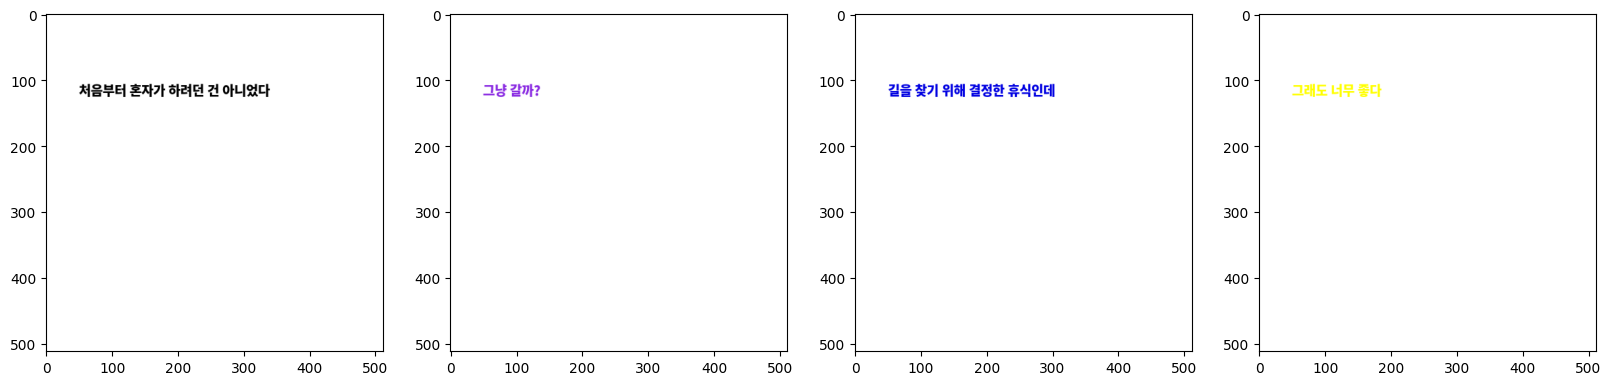

In [144]:
import matplotlib.pyplot as plt
import cv2

# 순서대로 neutral, embrassment, anxious, happy
subtitle_images_list = ['./output_img/0.png', './output_img/4.png', './output_img/8.png', './output_img/27.png']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, img_path in zip(axs.flat, subtitle_images_list):
    img = cv2.imread(img_path)
    ax.imshow(img)

plt.show()


### 3. Time stamp에 따라 여러 자막 이미지를 영상과 합성

In [ ]:
import cv2
import numpy as np 

In [2]:
import cv2
import numpy as np

img1 = cv2.imread("./subtitle.png")
img2 = cv2.imread("./st2.png")

# 사진 사이즈 맞추기
rows, cols, _ = np.shape(img1)
img2 = cv2.resize(img2, (cols, rows))


In [ ]:
# 영상 파일과 자막 이미지 파일 리스트
video_file = "./test3.mp4"
subtitle_image_files = [img1, img2]

In [ ]:
# 영상 파일 열기
video_capture = cv2.VideoCapture(video_file)

# 영상 크기 얻기
video_width = int(video_capture.get(3))
video_height = int(video_capture.get(4))

In [ ]:
# 자막 이미지 리스트
subtitle_images = []
for subtitle_image_file in subtitle_image_files:
    subtitle_image = cv2.imread(subtitle_image_file)
    subtitle_images.append(subtitle_image)

subtitle_images = []
subtitle_heights = []
subtitle_widths = []
for subtitle_image_file in subtitle_image_files:
    subtitle_image = cv2.imread(subtitle_image_file)
    subtitle_images.append(subtitle_image)
    subtitle_height, subtitle_width, _ = subtitle_image.shape
    subtitle_heights.append(subtitle_height)
    subtitle_widths.append(subtitle_width)

In [ ]:
### 타임스탬프 초 단위 환산
start_times = ['01:02:25:11']
end_times = ['01:02:35:22']

def convert_to_seconds(time):
    h, m, s, ms = map(int, time.split(':'))
    return 3600 * h + 60 * m + s + ms / 100.0

start_times = [convert_to_seconds(time) for time in start_times]
end_times = [convert_to_seconds(time) for time in end_times]

print(start_times)
print(end_times)

In [ ]:
### 타임스탬프에 따라 자막 이미지 합성
output_file = "./result4.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, 20.0, (video_width, video_height))

start_times = [5.26, 24.24]
end_times = [8.08, 27.22]

frame_counter = 0
i = 0
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    
    if i < len(start_times) and frame_counter / 20.0 >= start_times[i]:
        subtitle_image = subtitle_images[i]
        subtitle_height, subtitle_width, _ = subtitle_image.shape
        x_offset = (video_width - subtitle_width) // 2
        y_offset = video_height - subtitle_height
        roi = frame[y_offset:y_offset+subtitle_height, x_offset:x_offset+subtitle_width]
        img2gray = cv2.cvtColor(subtitle_image, cv2.COLOR_BGR2RGB)
        img2gray = cv2.cvtColor(img2gray, cv2.COLOR_RGB2GRAY)
        ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)
        img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
        img2_fg = cv2.bitwise_and(subtitle_image, subtitle_image, mask=mask)
        dst = cv2.add(img1_bg, img2_fg)
        frame[y_offset:y_offset+subtitle_height, x_offset:x_offset+subtitle_width] = dst
    
    out.write(frame)
    frame_counter += 1
    
    if i < len(end_times) and frame_counter / 20.0 >= end_times[i]:
        i += 1

out.release()
